**MITx 6.419x  Data Analysis: Statistical Modeling and Computation in Applications**  
Written report -- Homework3_Network_Analysis  
Collaborators: none  
4/19/21  
---

>## Problem 1: Suggesting Similar Papers
>### Part (c):   (2 points)  (100 word limit.)
How does the time complexity of your solution involving matrix multiplication in part (a) compare to your friend's algorithm?

### solution:
In my solution, $C = A^T \cdot A$. Matrix $A$ and $A^T$ both have n rows and n column.
Traversing matrix C uses two cycles: 
1. traversing n rows, each row includes n elements, the complexity for that is $n \times n$ 
2. Each element in matrix C is calculated by multiplying a row of A by a column of B, and a round of cycles use n elements, the complexity for that is n.

So the time complexity of my solution is $n \times n \times n$.

Comparing to  my friend's algorithm, the time complexity of both algorithm are $n \times n \times n$

>### Part (d):   (3 points)(200 word limit.)
 Bibliographic coupling and cocitation can both be taken as an indicator that papers deal with related material. However, they can in practice give noticeably different results. Why? Which measure is more appropriate as an indicator for similarity between papers?

### solution:
![compare](preview.jpg)
The picture above shows the difference between co-citations and Bibliographic coupling.

The more co-citations two documents receive, the higher their co-citation strength, and the more likely they are semantically related. The "coupling strength" of two given documents is higher the more citations to other documents they share. 

Both methods are effective. In my opinionis， Co-citation is more appropriate as an indicator for similarity between papers.
Co-citation analysis provides a forward-looking assessment on document similarity in contrast to Bibliographic Coupling, which is retrospective. The citations a paper receives in the future depend on the evolution of an academic field, thus co-citation frequencies can still change. In the adjacent diagram, for example, Doc A and Doc B may still be co-cited by future documents, say Doc F and Doc G. This characteristic of co-citation allows for a dynamic document classification system when compared to Bibliographic Coupling.

>## Problem 2: Investigating a time-varying criminal network
>### Part (c):   (2 points)  (∼100 words, 200 word limit.)
Observe the plot you made in Part (a) Question 1. The number of nodes increases sharply over the first few phases then levels out. Comment on what you think may be causing this effect. Based on your answer, should you adjust your conclusions in Part (b) Question 5?

### solution:

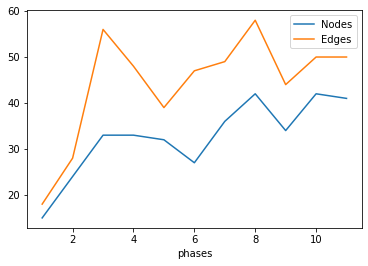

In [4]:
## Plotting tools

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Import data processing packages
import pandas as pd
import numpy as np

#Import network packages
import networkx as nx

# Install pygraphviz

phases = {}
G = {}
G_summaries = {'Nodes': [], 'Edges': []}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  G_summaries['Nodes'].append(G[i].number_of_nodes())
  G_summaries['Edges'].append(G[i].number_of_edges())
plt.plot(range(1,12), [ G[i].number_of_nodes() for i in range(1,12) ], label="Nodes")
plt.plot(range(1,12), [ G[i].number_of_edges() for i in range(1,12) ], label="Edges")
plt.legend()
plt.xlabel('phases')
plt.show()




In the process of criminal investigation, the higher the degree of network centralization of criminals, the more difficult it is to be arrested. On the contrary, the farther away from the crime centre, the easier it is to be arrested. Therefore, at the initial stage of the investigation, only a few marginal criminals were arrested, and the criminal network of these criminals was sparse, so there were few nodes and edges. As the investigation proceeded, the criminals on the centre were gradually arrested. The network of centre criminals is very dense, so more nodes and edges can be found. 
Therefore, for the accurate calculation of  Part (b) Question 5, the centralization weight of the later phase should be increased, which is more reasonable than the mean value.

>### Part (d):   (5 points)  (∼300 words, 400 word limit.)
In the context of criminal networks, what would each of these metrics teach you about the importance of an actor's role in the traffic? In your own words, could you explain the limitations of degree centrality? In your opinion, which one would be most relevant to identify who is running the illegal activities of the group? Please justify.

### Solution:
Each of these metrics shows different roles of an actor in the traffic, it depends on which perspective we choose.
One of the reasons why so many centrality measures have been defined is because all of the measures have limitations. Each works well for probing certain phenomena, but at the same time, each measure also fails to capture other important structural characteristics of a network.
![limitations](limitations.png)
The four centrality measures each identify a different node as the "most central." None of the centrality measures are "wrong"; they just all answer different questions. If we're doing a simple analysis of who's most popular in a social network, prioritizing nodes by betweenness centrality could be misleading. Meanwhile, a lot of immunization strategies in analyses of epidemic spreading rely on immunizing nodes with high betweenness. In this circumstance, immunizing people based on their degree centrality could be sub-optimal. All of the above can be summarized as follows: each centrality measure is attempting to capture some intuition or some set of intuitions, so it's clear that each will be of limited use to address scientific questions where some other intuition is needed.
In my opinion, betweenness centrality would be most relevant to identify who is running the illegal activities of the group.

In addition, there is a subtle limitation in degree centrality, that is, a centrality measure is inadequate to capture even it was intended. In a paper titled Localization and Centrality in Networks., T. Martin, X. Zhang, and M. E. J. Newman argue that this can happen for eigenvector centrality in certain circumstances 

>Eigenvector centrality is based on the intuition that a node’s importance in a network is determined by how important its neighbors are. We can imagine initializing the centrality of each node in a network to  1  and then iteratively updating the centrality of each node to be the sum of the centralities of its neighbors’ centralities. We can visualize the first steps of this process for a simple undirected network here:
![limitations](2.png)
The central node in this example passes its centrality along to its neighbors, and then, in the next step, that centrality gets reflected back to the central node. This repeated “reflection” can result in a heavy, and perhaps unjustifiably large, accumulation of eigenvector centrality near high-degree nodes in a network. 

>### Part (e):   (3 points)  (∼100 words, 200 word limit)
In real life, the police need to effectively use all the information they have gathered, to identify who is responsible for running the illegal activities of the group. Armed with a qualitative understanding of the centrality metrics from Part (d) and the quantitative analysis from part Part (b) Question 5, integrate and interpret the information you have to identify which players were most central (or important) to the operation.

>Hint: Note that the definition of a player's “importance" (i.e. how central they are) can vary based on the question you are trying to answer. Begin by defining what makes a player important to the group (in your opinion) ; use your answers from Part (d) to identify which metric(s) are relevant based on your definition and then, use your quantitative analysis to identify the central and peripheral traffickers. You may also perform a different quantitative analysis, if your definition of importance requires it.

### Solution:
In Part (d), I discussed the different types of quantitative analyses, and I think betweenness centrality would be most relevant to identify who is running the illegal activities of the group. 

In Part (b) Question 5, I discussed the reason that The number of nodes increases sharply over the first few phases then levels out. And I mentioned that the centralization weight of the later phase should be increased, which is more reasonable than the mean value.
In Part (b) Question 5,I found that the number of nodes increases as the phase go on, so I choose the change of nodes to calculate the weight of each phase. 

$$Weight = \frac{Number_{nodes \ in \ each \ phase}}{Number_{nodes \ in \ all \ phase}}$$ 

As the phase goes on, the weight value will increase. Of course, I just chose a relatively simple algorithm to calculate the weight value, it can also be calculated by other methods. The code is shown below and we find n1, n12 and n3 were most central (or important) to the operation.

In [5]:
sum_nodes = sum(G_summaries['Nodes'])

weight = np.array(G_summaries['Nodes'])/sum_nodes
bet_weight_df = pd.DataFrame()


def compute_metric(metric_fn):
  return { i: metric_fn(G[i]) for i in range(1,12) }

bet = compute_metric(lambda g: nx.betweenness_centrality(g, normalized = True)) ## the betweenness values are normalized by 2/((n-1)(n-2)) for graphs, and 1/((n-1)(n-2)) for directed graphs where n is the number of nodes in G.
bet_df = pd.DataFrame.from_dict(bet, orient='index')
bet_df = bet_df.fillna(0)
bet_df['weight'] = weight.tolist()
# print(bet_df)

for column in bet_df.drop('weight',axis=1):
#     bet_weight_df[column] = bet_df[weight_].multiply(df_bet[column], axis="index")
    bet_weight_df[column] = bet_df.apply(lambda x: x[column] * x['weight'], axis=1)
# print(bet_weight_df.sum())
bet_df.drop('weight',axis=1,inplace = True)
bet_statistics = pd.DataFrame([bet_weight_df.sum(),bet_df.mean(), bet_df.astype(bool).sum(axis=0)], index=['Weight_Mean','Mean', 'Activity'])
bet_statistics = bet_statistics.T.reset_index()

print("Highest Weighted average Centrality : ")
print("Betweenness - ")
print(bet_statistics.sort_values(by=['Weight_Mean'], ascending = False).head(10))


Highest Weighted average Centrality : 
Betweenness - 
   index  Weight_Mean      Mean  Activity
0     n1     0.621548  0.655051      11.0
25   n12     0.182715  0.167562       7.0
4     n3     0.136982  0.129403       8.0
22   n76     0.095690  0.083791       7.0
54   n87     0.073428  0.061327       5.0
84   n41     0.063277  0.050369       1.0
42   n14     0.041787  0.032671       3.0
2    n89     0.038035  0.047948       4.0
50   n82     0.034613  0.029196       3.0
3    n83     0.028829  0.031785       6.0


>### Part (f) Question 2:   (3 points)   (∼200 words, 300 word limit.)
The change in the network from Phase X to X+1 coincides with a major event that took place during the actual investigation. Identify the event and explain how the change in centrality rankings and visual patterns, observed in the network plots above, relates to said event.

### Solution:
The top ten betweenness centrality rankings for each phase are output, and a line chart of the change in funds and betweenness centrality of n1 is drawn. From the perspective of phase changes, when criminal funds are small, the network shown by visual patterns is sparse, and centrality is highly concentrated on one criminal. When criminal funds are large, the network shown by visual patterns is dense. Centrality is no longer highly concentrated on one criminal, centrality is diluted by many criminals. Taking criminal n1 as an example, its centrality is inversely related to criminal funds.

phase1
n1      0.906593
n89     0.142857
n88     0.053114
n83     0.036630
n85     0.036630
n6      0.010989
n49     0.000000
n107    0.000000
n84     0.000000
n109    0.000000
Name: 1, dtype: float64
phase2
n1     0.942688
n89    0.123847
n83    0.086957
n88    0.083004
n76    0.038208
n11    0.006588
n85    0.003294
n8     0.001976
n3     0.001976
n25    0.000000
Name: 2, dtype: float64
phase3
n1     0.829503
n3     0.095497
n9     0.067540
n5     0.062500
n83    0.046573
n6     0.033333
n85    0.029973
n86    0.028024
n49    0.007527
n2     0.001008
Name: 3, dtype: float64
phase4
n1      0.839310
n89     0.196213
n3      0.090438
n83     0.079589
n13     0.062500
n107    0.062500
n8      0.062500
n86     0.047427
n85     0.016537
n9      0.014761
Name: 4, dtype: float64
phase5
n1     0.883871
n12    0.269892
n83    0.064516
n89    0.064516
n85    0.064516
n31    0.064516
n3     0.044086
n4     0.000000
n63    0.000000
n49    0.000000
Name: 5, dtype: float64
phase6
n1      0.542564
n

Text(0.5, 1.0, ' betweenness centrality of n1')

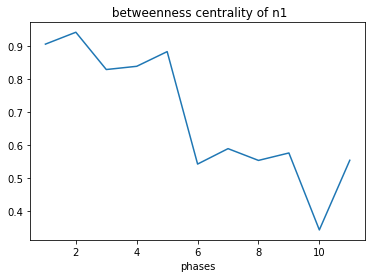

In [6]:
i = int(0)
for index, row in bet_df.iterrows():
    i+=1
    row_sort = row.sort_values(ascending = False).head(10)
    print("phase" + str(i))
    print(row_sort)
plt.plot(range(1,12), [ 0.906593, 0.942688, 0.829503, 0.839310, 0.883871, 0.542564, 0.589356, 0.553659, 0.576231, 0.342683, 0.554060 ], label="n1")
plt.xlabel('phases')
plt.title(' betweenness centrality of n1')

Text(0.5, 1.0, 'Monetary losses')

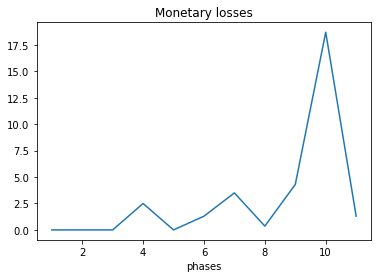

In [7]:
plt.plot(range(1,12), [ 0, 0, 0, 2.5, 0, 1.3, 3.5, 0.36, 4.3, 18.7, 1.3, ], label="Monetary losses")
plt.xlabel('phases')
plt.title('Monetary losses')

>### Part (g):   (4 points)  (∼200 words, 300 word limit.)
While centrality helps explain the evolution of every player's role individually, we need to explore the global trends and incidents in the story in order to understand the behavior of the criminal enterprise.
Describe the coarse pattern(s) you observe as the network evolves through the phases. Does the network evolution reflect the background story?

>Hint: Look at the set of actors involved at each phase, and describe how the composition of the graph is changing. Investigate when important actors seem to change roles by their movement within the hierarchy. Correlate your observations with the information that the police provided in the setup to this homework problem.

### Solution:
In this Part, I continue to analyze through the graphs in Part (f). In the early days, the criminal group was a very small organization. N1, as the Mastermind of the network, had connections with almost every other member. As crimes escalated and more criminals participated, many criminals who had been following n1 began to become network centers, such as n12 and n3. In the later phase of the phase, n1 contacted only a few criminals.

>### Part (h):   (2 points)  (∼50 words, 100 word limit.)
Are there other actors that play an important role but are not on the list of investigation (i.e., actors who are not among the 23 listed above) ? List them, and explain why they are important.

### Solution:
Yes, there are other actors that play an important role but are not on the list of investigation. Use the method in Part (e) solution, I sorted the betweenness centrality ranking that shown below and found the criminal list:

$$n76, \ n41, \ n79, \ n37, \ n8, \ n9$$ 

In [8]:
print(bet_statistics.sort_values(by=['Weight_Mean'], ascending = False).head(20))

   index  Weight_Mean      Mean  Activity
0     n1     0.621548  0.655051      11.0
25   n12     0.182715  0.167562       7.0
4     n3     0.136982  0.129403       8.0
22   n76     0.095690  0.083791       7.0
54   n87     0.073428  0.061327       5.0
84   n41     0.063277  0.050369       1.0
42   n14     0.041787  0.032671       3.0
2    n89     0.038035  0.047948       4.0
50   n82     0.034613  0.029196       3.0
3    n83     0.028829  0.031785       6.0
59   n79     0.026345  0.021941       2.0
7    n85     0.022335  0.023733      10.0
72   n37     0.020524  0.015951       2.0
14    n8     0.010092  0.009170       4.0
78   n96     0.009110  0.007856       2.0
57   n22     0.008988  0.006984       1.0
10    n7     0.008311  0.007978       1.0
6    n88     0.007830  0.012435       3.0
23    n9     0.007565  0.007482       2.0
15   n86     0.007173  0.007044       3.0


>The remaining two questions will concern the directed graphs derived from the CAVIAR data.
>### Part (i):   (2 points)  (∼150 words, 250 word limit.)
What are the advantages of looking at the directed version vs. undirected version of the criminal network?

>Hint: If we were to study the directed version of the graph, instead of the undirected, what would you learn from comparing the in-degree and out-degree centralities of each actor? Similarly, what would you learn from the left- and right-eigenvector centralities, respectively?

### Solution:
Directed graphs are more informative than corresponding undirected graphs when the network is sparse. This means that if we treat a sparse directed graph as undirected we probably lose information
Directed graphs apply well to model relationships which are directional and not reciprocal in nature. A good example is a relationship “is a executes of”, upon which we construct criminal trees
Undirected graphs apply well to relationships for which it matters whether they exist or not, but aren’t intrinsically transitive. 
We can model the same system as a directed graph in some circumstances and as an undirected graph in others. For example, we can represent a family as a directed graph if we’re interested in studying progeny. If we’re studying clan affiliations, though, we can represent it as an undirected graph

>### Part (j):   (4 points) (∼300 words, 400 word limit)(∼300 words, 400 word limit)
Recall the definition of hubs and authorities. Compute the hub and authority score of each actor, and for each phase. (Remember to load the adjacency data again this time using create_using = nx.DiGraph().)

>With networkx you can use the nx.algorithms.link_analysis.hits function, set max_iter=1000000 for best results.

>Using this, what relevant observations can you make on how the relationship between n1 and n3 evolves over the phases. Can you make comparisons to your results in Part (g)?


### Solution:
With the phases go on, the hub scores of n1 are decrease and hub scores of n3 are increase; the authority scores of n1 are increase and authority scores of n3 are decrease. That means n3 gradually becomes a new contact hub， and n1 trends to give instructions to few people.That increases the criminal concealment of n1.

phase1
hubs score: {'n1': 0.42165703018931017, 'n4': 0.0, 'n89': 0.0422972611685682, 'n83': 0.06687382179337698, 'n3': 0.09447758797853548, 'n5': 0.0, 'n88': 0.1599970764816512, 'n85': 0.1224400601019736, 'n90': 0.0, 'n2': 0.0, 'n7': 0.03669092397798762, 'n54': 0.0, 'n6': 0.05556623830859663, 'n64': 0.0, 'n8': 0.0}
authority score: {'n1': 0.0791014914689256, 'n4': 0.068616896990665, 'n89': 0.07458766747106635, 'n83': 0.0, 'n3': 0.09465346741716718, 'n5': 0.068616896990665, 'n88': 0.1129586190870015, 'n85': 0.09465346741716718, 'n90': 0.068616896990665, 'n2': 0.068616896990665, 'n7': 0.006883098422316634, 'n54': 0.068616896990665, 'n6': 0.05684390978170063, 'n64': 0.068616896990665, 'n8': 0.068616896990665}
phase2
hubs score: {'n1': 0.6730461441120974, 'n89': 0.00028546780996016434, 'n83': 0.0, 'n3': 0.08576021363054886, 'n5': 0.0, 'n88': 0.004480701669845821, 'n85': 0.08576021363054886, 'n90': 0.0, 'n86': 0.004211365637371194, 'n2': 0.004211365637371194, 'n7': 0.04031182054584639, 'n6'

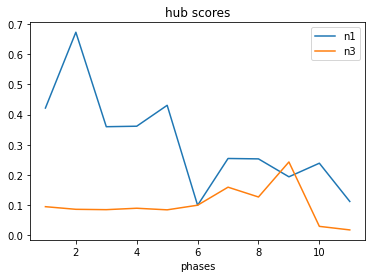

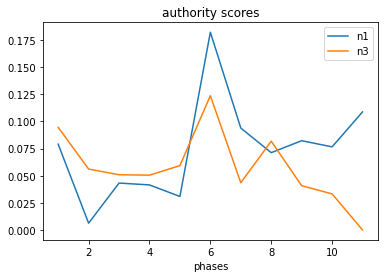

In [9]:
# print(np.array(phases[1]))
# print(phases[1])
graph = {}
phases_values = []
n1_hub, n1_authority, n3_hub, n3_authority = [], [], [], []
j = int(0)
for i in range(1,12):
    j += 1
    phases_name = phases[i].columns.values.tolist() 
    graph[i] = nx.from_numpy_matrix(np.array(phases[i]), create_using=nx.DiGraph)
    v,w=nx.link_analysis.hits(graph[i], max_iter = 1000000)

    phases_v = v.values()
    phases_w = w.values()
    hub = dict(zip(phases_name, phases_v))
    authority = dict(zip(phases_name, phases_w))
    
    n1_hub.append(hub['n1'])
    n3_hub.append(hub['n3'])
    n1_authority.append(authority['n1'])
    n3_authority.append(authority['n3'])

    print('phase' + str(j))
    print('hubs score:',hub)
    print('authority score:',authority)
plt.plot(range(1,12), n1_hub, label="n1")
plt.plot(range(1,12), n3_hub, label="n3")
# plt.plot(range(1,12), [ G[i].number_of_edges() for i in range(1,12) ], label="Edges")
plt.legend()
plt.title('hub scores')
plt.xlabel('phases')
plt.show()
plt.plot(range(1,12), n1_authority, label="n1")
plt.plot(range(1,12), n3_authority, label="n3")
plt.legend()
plt.title('authority scores')
plt.xlabel('phases')
plt.show()

>## Problem 3: Co-offending Network
>### Part (g):   (3 points)  (∼50 words, 100 word limit.)
Plot the degree distribution (or an approximation of it if needed) of G. Comment on the shape of the distribution. Could this graph have come from an Erdos-Renyi model? Why might the degree distribution have this shape?

### Solution:
The distribution is a power law distributions.  Its key characteristics are as follows:
1. Distribution is right skewed;
2. High ratio of max to min; 
3. No matter what scale you look at it, it looks the same.

Because each node has the possibility(p) of connecting with other points. Large node degree size means more nodes connected, that will results in small frequency.

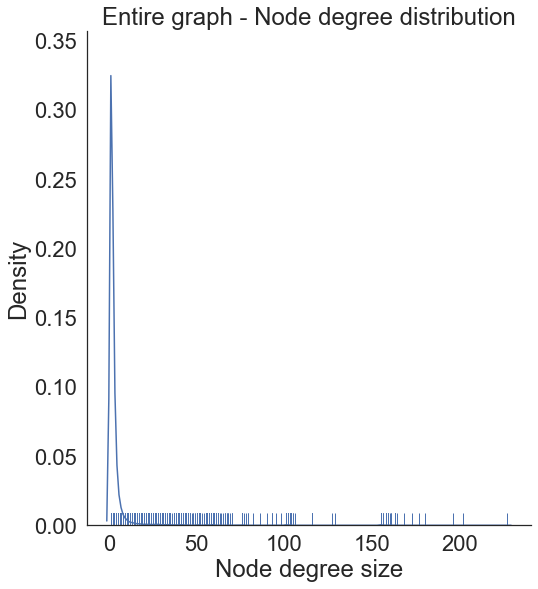

In [10]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.sparse import csr_matrix
import matplotlib
import matplotlib.pyplot as plt
import collections
import scipy
import statistics as stats
import seaborn as sns

df = pd.read_csv("Cooffending.csv")
df.CrimeDate = pd.to_datetime(df.CrimeDate)
df["NOffenders"] = df.NumberYouthOffenders + df.NumberAdultOffenders
n_cases_raw = len(df)
df = df.drop_duplicates()
# There are five people who are listed as both M and F, just drop one of them
df = df.drop_duplicates(subset=["OffenderIdentifier", "CrimeIdentifier"])
n_cases = len(df)
n_criminals = len(df.OffenderIdentifier.unique())
n_crimes = len(df.CrimeIdentifier.unique())
df.head()

# Remap to consecutive identifiers
OffenderIdentifier_dict = {OffenderIdentifier: i for i, OffenderIdentifier in enumerate(df.OffenderIdentifier.unique())}
CrimeIdentifier_dict = {CrimeIdentifier: i for i, CrimeIdentifier in enumerate(df.CrimeIdentifier.unique())}

# .replace has a lot of overhead
df.OffenderIdentifier = df.OffenderIdentifier.map(OffenderIdentifier_dict.get)
df.CrimeIdentifier = df.CrimeIdentifier.map(CrimeIdentifier_dict.get)

assert not df.OffenderIdentifier.isnull().any() and not df.CrimeIdentifier.isnull().any()
assert df.CrimeIdentifier.max() == df.CrimeIdentifier.nunique() - 1
assert df.OffenderIdentifier.max() == df.OffenderIdentifier.nunique() - 1

# Build matrix
row = df.OffenderIdentifier
col = df.CrimeIdentifier
vals = np.ones(len(row))

# Sparse representation
crime_matrix = csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))

cooffend_matrix = crime_matrix @ crime_matrix.T

# Save an unmodified copy for later
cooffend_matrix_raw = cooffend_matrix.copy()

# convert to (binary) adj. matrix
# Could use the full cooffending matrix for project
cooffend_matrix[cooffend_matrix > 0] = 1
cooffend_matrix.setdiag(0)
cooffend_matrix.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

g = nx.from_scipy_sparse_matrix(cooffend_matrix)

g_removed = g.copy()
g_removed.remove_nodes_from(list(nx.isolates(g_removed)))
G3 = g_removed
# print(G3)

degree_sequence = sorted([d for n, d in G3.degree()], reverse=True)
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.displot(data = degree_sequence,  kind="kde", rug = True, height = 8)
ax.set(xlabel="Node degree size",ylabel= "Density",title='Entire graph - Node degree distribution')
plt.show()

>### Part (m):   (4 points)  (∼300 words, 400 word limit.)
Plot the distribution of clustering coefficients for each node for Gr and Gnr. What shape do the plots make? What does this tell you about the behavior of the actors? Hint: What does it mean for an actor to have a clustering coefficient of 0.5? Are there as many actors with intermediate clustering coefficients (say, between 0.25 and 0.75) as you expect for each graph?

### Solution:
The distribution graph shows that most of the clustering coefficients are clustered near 0 and 1. This means that the members of the criminal gang either all commit crimes together, or only cooperate with a few members to commit crimes.

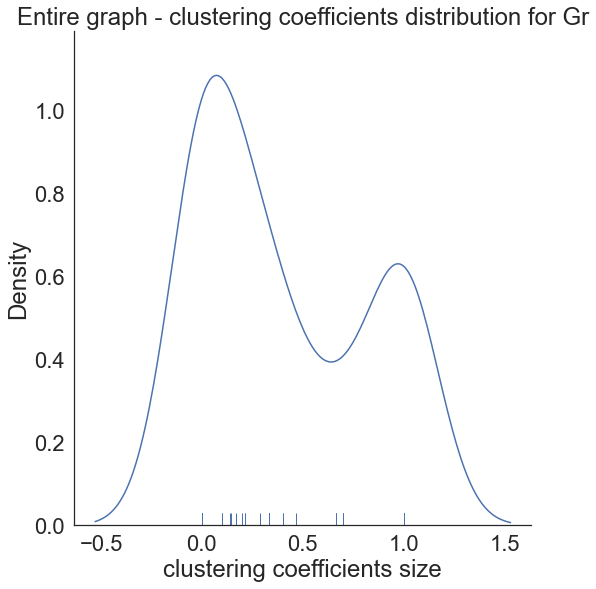

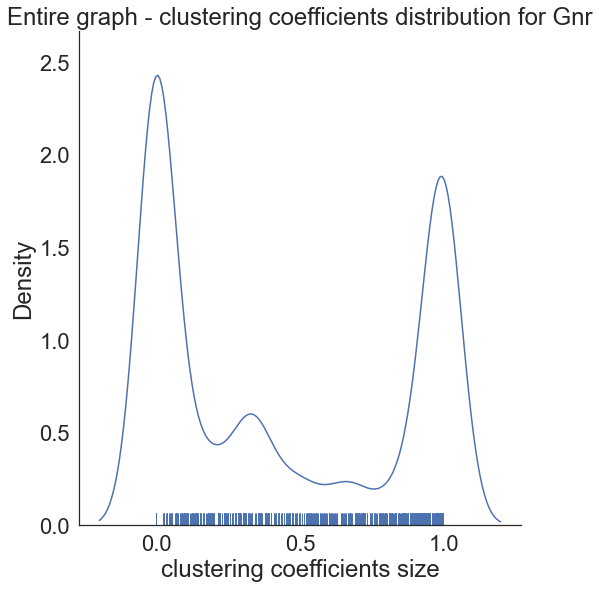

In [11]:

# Separate matrices for repeating co-offenders vs non-repeating co-offenders
cooffend_matrix_repeat = cooffend_matrix_raw.copy()
cooffend_matrix_no_repeat = cooffend_matrix_raw.copy()

# Repeating co-offenders: edge strength >= 2
cooffend_matrix_repeat.data[np.where(cooffend_matrix_repeat.data<2)[0]]=0
cooffend_matrix_repeat[cooffend_matrix_repeat > 0] = 1
cooffend_matrix_repeat.setdiag(0)
cooffend_matrix_repeat.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

# Non-repeating co-offenders: edge strength = 1
cooffend_matrix_no_repeat.data[np.where(cooffend_matrix_no_repeat.data!=1)[0]]=0
cooffend_matrix_no_repeat[cooffend_matrix_no_repeat > 0] = 1
cooffend_matrix_no_repeat.setdiag(0)
cooffend_matrix_no_repeat.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

g_r = nx.from_scipy_sparse_matrix(cooffend_matrix_repeat)
g_nr = nx.from_scipy_sparse_matrix(cooffend_matrix_no_repeat)

g_r.remove_nodes_from(list(nx.isolates(g_r)))
g_nr.remove_nodes_from(list(nx.isolates(g_nr)))

g_r_component_list = sorted(nx.connected_components(g_r), key=len, reverse=True)
g_nr_component_list = sorted(nx.connected_components(g_nr), key=len, reverse=True)

g_r_largest_component = g_r.subgraph(g_r_component_list[0])
g_nr_largest_component = g_nr.subgraph(g_nr_component_list[0])

g_r_largest_component_clustering = list(nx.clustering(g_r_largest_component).values())
g_nr_largest_component_clustering = list(nx.clustering(g_nr_largest_component).values())

# g_r_largest_component_clustering_sequence = sorted([d for d in g_r_largest_component_clustering], reverse=True)
# g_nr_largest_component_clustering_sequence = sorted([d for d in g_nr_largest_component_clustering], reverse=True)


sns.set(font_scale=2)
sns.set_style("white")
ax = sns.displot(data = g_r_largest_component_clustering,  kind="kde", rug = True, height = 8)
ax.set(xlabel="clustering coefficients size",ylabel= "Density",title='Entire graph - clustering coefficients distribution for Gr')
plt.show()


ax = sns.displot(data = g_nr_largest_component_clustering,  kind="kde", rug = True, height = 8)
ax.set(xlabel="clustering coefficients size",ylabel= "Density",title='Entire graph - clustering coefficients distribution for Gnr')
plt.show()



>### Part (n):   (4 points)  (∼200 words, 300 word limit.)
>Pick a centrality measure (degree, eigenvector, betweenness, etc) and compute the scores for the top (largest) component of Gr and Gnr. Compare the distribution of the centrality across nodes (for example, with summary statistics and/or a histogram). Examine the number of crimes committed by the most central actor in the repeat offender graph, does this support your conclusions?.

### Solution
-------
#### It’s a pity that my computer is too slow, and this problem can’t be calculated normally.
------

In [ ]:
bet_gr = nx.degree_centrality(g_r_largest_component, normalized = True)
bet_gn = nx.degree_centrality(g_nr_largest_component, normalized = True)
print(bet_gr)

>### Project:
The last part of this assignment is an open-ended project. Choose a sociologically interesting question about the co-offending network, and try to answer your question using the data. You can subset the data in whichever way you desire as long as it is sociologically meaningful. For example, you can group nodes by attributes such as sex, group edges such as repeat/non-repeating cooffenses, use the weighted or unweighted co-offending networks, focus on the largest connected component, etc.

>Project expectations/Rubric:

>1. Clearly states a sociological question which is interesting and relevant to the data. The question must be sociologically motivated: for example, “Compare the network structure in 2003 vs 2009" is not a good question, without further context. If you have some reason to believe that the network structure changes in those years, then you should make that your central question: for example, “Did crimes involving youth offenders become more organized and structured over the years" is a better question, from which comparing the structure in different years becomes part of the methodology to answer the question. More examples of possible questions are provided below.

>2.    (2 points) Describes methodology for network analysis.

>>(2 points) Grader is convinced that the methodology makes sense for the question to be answered.

>>(1 point) Grader is convinced that no additional methodology within the bounds of techniques taught and discussed in this module could be applied beyond what was described. Additional clarification (April 13): The grader should only consider additional methodology that adds meaningfully to the answer for the question: additions that simply repeat or confirm the presented results should not be considered by the grader. If a justification is provided for why a particular method was not used, the grader should be convinced by that argument.

>3.    (2 points) Presents results, including figures and/or statistics, which address the question of interest.

>>(2 points) The described methodology has been applied in complete and the results shown (that is, the author did not forget to include anything they discussed in the methodology.)

>4.Adequately discusses the results obtained.

>>(2 points) Question does not need to be successfully answered, but the grader should be convinced that the author has answered the question to the best ability of the methodology presented.

>>(3 points) Provides commentary on what was discovered, what were the limitations of the methods, what may have been surprising to discover, etc.

>>(1 point) Award this point if the question was successfully answered to the grader's satisfaction.

### Solution
In this project, I will study the network containing juvenile delinquency. The purpose of this project is to study the network structure of youth criminals.

>Degree Centrality counts how many direct connections you have (sometimes, for example in a money network, it makes sense to differentiate between in-degree - how many people give you money, and out-degree - how many do you give to).

>Betweenness Centrality measures how often you sit on the shortest path between two others. This is seen as a measure of control. Let's think about the money network again. If you have to give money to someone, but it has to go through me and you have no direct connection to the other person, I can basically just run off with the money and tell the other person I never got it...

>Closeness Centrality: How many steps do you have to take to reach everyone in the network (directly or indirectly). This is a measure of access. Some people say that control (betweenness) and access (closeness) together are a measure of power.

>Eigenvector Centrality: Are you connected to actors who are well connected. A simple example is someone who is faithful but their partner is not. When it comes to their risk of getting HIV/Aids, the faithful person (just one link into the system) is nearly at the same risk as the unfaithful one (many links into the system), because he or she has a high eigenvector centrality.

After separating the data containing juvenile crimes from the original documents, the percentage of youth criminal is 13035/539593. 

Among them, 563 criminal have repeated cooperative crimes more than 2 times, and 6329 have repeated cooperative crimes not more than once.

Draw the Node degree distribution, we can see that the number of single-person crimes in youth criminal is only about half of total crimes, and they are more inclined to cooperative crimes. It can be seen from the clustering distribution graph that most teenagers who repeat crimes more than twice commit single-person crimes. Among the teenagers who repeat the crime once, single-person crime and group crime each account for half of them. 

As can be seen from the largest component clustering distribution graph, Almost everyone in the criminal group is involved, and it is rare for individual to do it alone.

From these analyses, we can roughly summerize some conclusions as follows:
1. The personal criminal ability of young people is not as good as that of adults, so young people use collective crimes to make up for this shortcoming. 
2. Youth criminal gangs are very united, so dismantling the gang will help reduce crime
3 Teenagers are more likely to commit crimes impulsively. Many people commit a crime once and do not repeat it. These young people tend to repent after committing a crime. The government may reduce crime by strengthening education. 
4. Teenagers who repeatedly commit crimes have formed criminal habits, so it is necessary to strengthen control.


Number of nodes in g: 13035




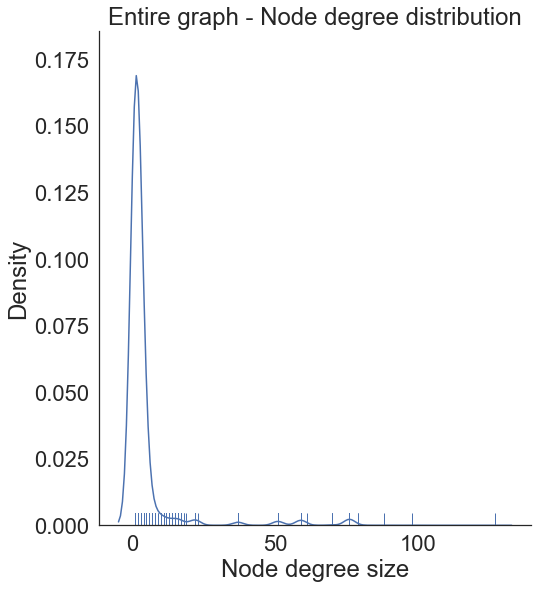


Number of nodes in G_r: 563
Number of nodes in G_nr: 6329



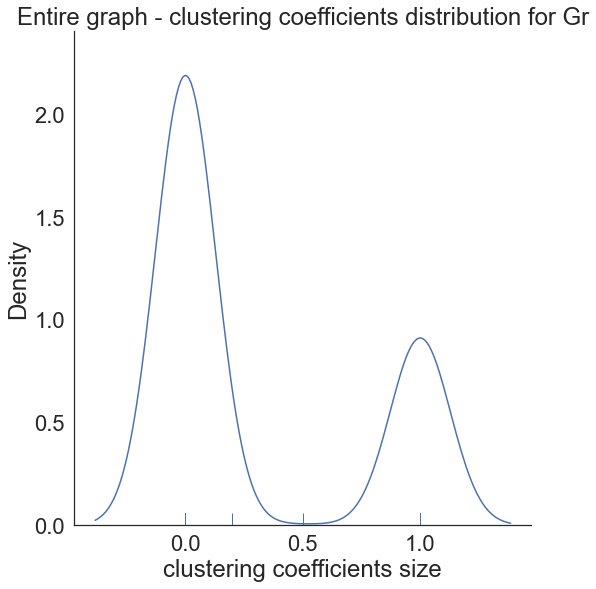

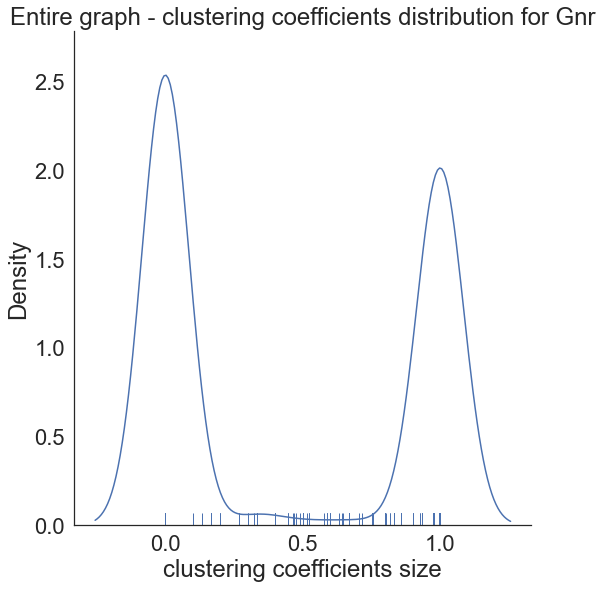


Number of nodes in largest_component of G_r: 6
Number of nodes in largest_component of G_nr: 161



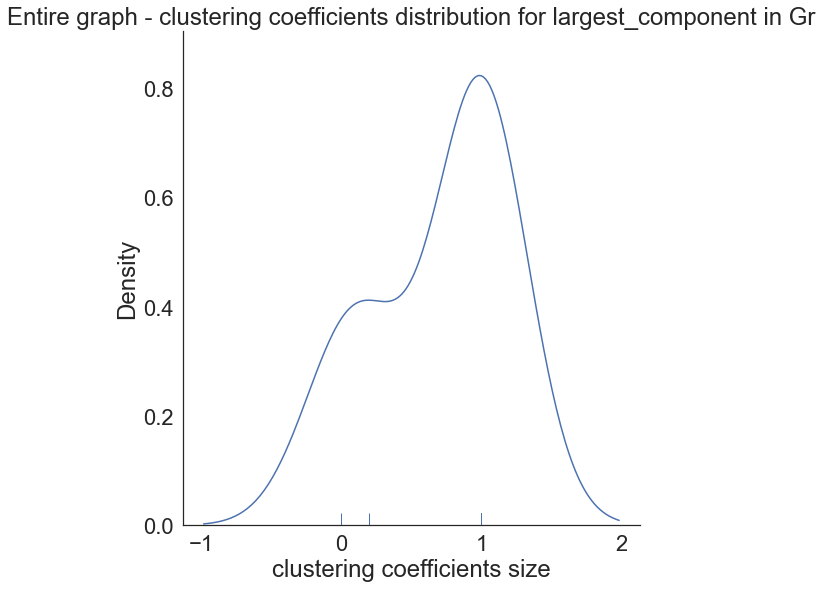

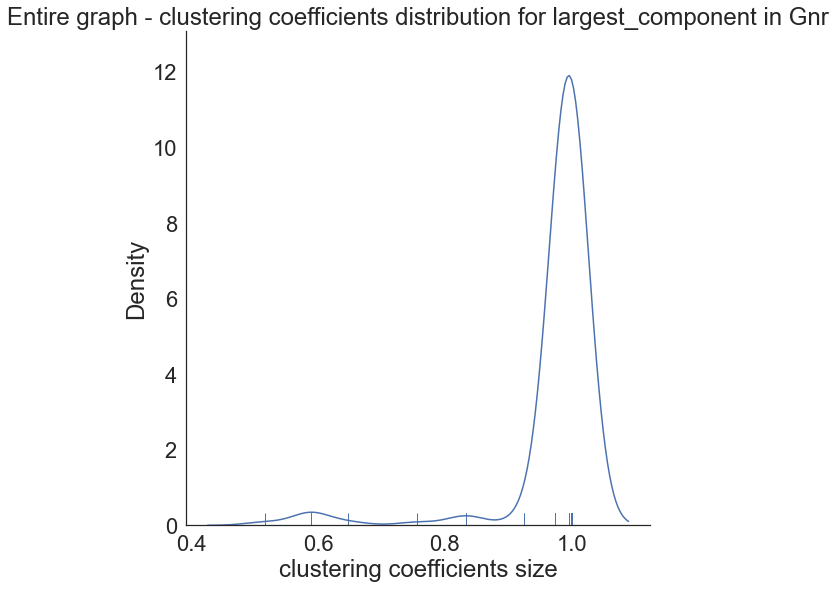

In [15]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.sparse import csr_matrix
import matplotlib
import matplotlib.pyplot as plt
import collections
import scipy
import statistics as stats
import seaborn as sns

df = pd.read_csv("Cooffending1.csv")
df.CrimeDate = pd.to_datetime(df.CrimeDate)
n_cases_raw = len(df)
df = df.drop_duplicates()
df = df.loc[(df['NumberYouthOffenders']>0.5)]
# There are five people who are listed as both M and F, just drop one of them
df = df.drop_duplicates(subset=["OffenderIdentifier", "CrimeIdentifier"])
n_cases = len(df)
n_criminals = len(df.OffenderIdentifier.unique())
n_crimes = len(df.CrimeIdentifier.unique())
df.head()

# Remap to consecutive identifiers
OffenderIdentifier_dict = {OffenderIdentifier: i for i, OffenderIdentifier in enumerate(df.OffenderIdentifier.unique())}
CrimeIdentifier_dict = {CrimeIdentifier: i for i, CrimeIdentifier in enumerate(df.CrimeIdentifier.unique())}

# .replace has a lot of overhead
df.OffenderIdentifier = df.OffenderIdentifier.map(OffenderIdentifier_dict.get)
df.CrimeIdentifier = df.CrimeIdentifier.map(CrimeIdentifier_dict.get)

assert not df.OffenderIdentifier.isnull().any() and not df.CrimeIdentifier.isnull().any()
assert df.CrimeIdentifier.max() == df.CrimeIdentifier.nunique() - 1
assert df.OffenderIdentifier.max() == df.OffenderIdentifier.nunique() - 1

# Build matrix
row = df.OffenderIdentifier
col = df.CrimeIdentifier
vals = np.ones(len(row))

# Sparse representation
crime_matrix = csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))

cooffend_matrix = crime_matrix @ crime_matrix.T

# Save an unmodified copy for later
cooffend_matrix_raw = cooffend_matrix.copy()

# convert to (binary) adj. matrix
# Could use the full cooffending matrix for project
cooffend_matrix[cooffend_matrix > 0] = 1
cooffend_matrix.setdiag(0)
cooffend_matrix.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

g = nx.from_scipy_sparse_matrix(cooffend_matrix)
print("""
Number of nodes in g: {}

""".format(g.number_of_nodes()))

g_removed = g.copy()
g_removed.remove_nodes_from(list(nx.isolates(g_removed)))
G3 = g_removed
# print(G3)
degree_sequence = sorted([d for n, d in G3.degree()], reverse=True)
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.displot(data = degree_sequence,  kind="kde", rug = True, height = 8)
ax.set(xlabel="Node degree size",ylabel= "Density",title='Entire graph - Node degree distribution')
plt.show()

# Separate matrices for repeating co-offenders vs non-repeating co-offenders
cooffend_matrix_repeat = cooffend_matrix_raw.copy()
cooffend_matrix_no_repeat = cooffend_matrix_raw.copy()

# Repeating co-offenders: edge strength >= 2
cooffend_matrix_repeat.data[np.where(cooffend_matrix_repeat.data<2)[0]]=0
cooffend_matrix_repeat[cooffend_matrix_repeat > 0] = 1
cooffend_matrix_repeat.setdiag(0)
cooffend_matrix_repeat.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

# Non-repeating co-offenders: edge strength = 1
cooffend_matrix_no_repeat.data[np.where(cooffend_matrix_no_repeat.data!=1)[0]]=0
cooffend_matrix_no_repeat[cooffend_matrix_no_repeat > 0] = 1
cooffend_matrix_no_repeat.setdiag(0)
cooffend_matrix_no_repeat.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern

g_r = nx.from_scipy_sparse_matrix(cooffend_matrix_repeat)
g_nr = nx.from_scipy_sparse_matrix(cooffend_matrix_no_repeat)

g_r.remove_nodes_from(list(nx.isolates(g_r)))
g_nr.remove_nodes_from(list(nx.isolates(g_nr)))

print("""
Number of nodes in G_r: {}
Number of nodes in G_nr: {}
""".format(g_r.number_of_nodes(), g_nr.number_of_nodes()))

g_r_clustering = list(nx.clustering(g_r).values())
g_nr_clustering = list(nx.clustering(g_nr).values())

sns.set(font_scale=2)
sns.set_style("white")
ax = sns.displot(data = g_r_clustering,  kind="kde", rug = True, height = 8)
ax.set(xlabel="clustering coefficients size",ylabel= "Density",title='Entire graph - clustering coefficients distribution for Gr')
plt.show()

ax = sns.displot(data = g_nr_clustering,  kind="kde", rug = True, height = 8)
ax.set(xlabel="clustering coefficients size",ylabel= "Density",title='Entire graph - clustering coefficients distribution for Gnr')
plt.show()

g_r_component_list = sorted(nx.connected_components(g_r), key=len, reverse=True)
g_nr_component_list = sorted(nx.connected_components(g_nr), key=len, reverse=True)

g_r_largest_component = g_r.subgraph(g_r_component_list[0])
g_nr_largest_component = g_nr.subgraph(g_nr_component_list[0])

g_r_largest_component_clustering = list(nx.clustering(g_r_largest_component).values())
g_nr_largest_component_clustering = list(nx.clustering(g_nr_largest_component).values())

# g_r_largest_component_clustering_sequence = sorted([d for d in g_r_largest_component_clustering], reverse=True)
# g_nr_largest_component_clustering_sequence = sorted([d for d in g_nr_largest_component_clustering], reverse=True)

print("""
Number of nodes in largest_component of G_r: {}
Number of nodes in largest_component of G_nr: {}
""".format(g_r_largest_component.number_of_nodes(), g_nr_largest_component.number_of_nodes()))

sns.set(font_scale=2)
sns.set_style("white")
ax = sns.displot(data = g_r_largest_component_clustering,  kind="kde", rug = True, height = 8)
ax.set(xlabel="clustering coefficients size",ylabel= "Density",title='Entire graph - clustering coefficients distribution for largest_component in Gr')
plt.show()


ax = sns.displot(data = g_nr_largest_component_clustering,  kind="kde", rug = True, height = 8)
ax.set(xlabel="clustering coefficients size",ylabel= "Density",title='Entire graph - clustering coefficients distribution for largest_component in Gnr')
plt.show()